In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [23]:
AAPL_path = Path('AAPL.csv')
Tesla_path = Path('Tesla.csv.csv')

In [24]:
Tesla = pd.read_csv(Tesla_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
Tesla = Tesla.sort_index()
Tesla.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [25]:
AAPL = pd.read_csv(AAPL_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
AAPL = AAPL.sort_index()
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [26]:
#identify of nulls records
AAPL.isnull().mean() * 100
Tesla.isnull().mean() * 100

Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

In [27]:
AAPL=AAPL.dropna()
Tesla=Tesla.dropna()

In [28]:
#validate nulls have been dropped
AAPL.isnull().sum()
Tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [29]:
joined_data_columns = pd.concat([AAPL, Tesla], axis="columns", join="inner")
joined_data_columns

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,,,,,
2010-06-29,9.432857,9.442500,9.082143,9.148929,7.833995,1133344800,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,9.168214,9.213214,8.928929,8.983214,7.692095,739452000,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,9.082143,9.100000,8.686429,8.874286,7.598822,1022896000,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,8.946071,8.961786,8.685714,8.819286,7.551729,693842800,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,8.964286,9.028571,8.791429,8.879643,7.603414,615235600,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.856766,69686800,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.807194,61236400,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,34.852501,35.187500,34.757500,35.115002,33.154182,102767200,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [30]:
joined_data_columns.drop(columns=['Volume', 'Open', 'High', 'Low','Adj Close'], inplace=True)
joined_data_columns.head()

,Close,Close
Date,,
2010-06-29,9.148929,23.889999
2010-06-30,8.983214,23.830000
2010-07-01,8.874286,21.959999
2010-07-02,8.819286,19.200001
2010-07-06,8.879643,16.110001


In [39]:
# Plot the relationship between the two variables
joined_data_columns.columns = ['AAPL', 'TESLA']
joined_data_columns.head()

,AAPL,TESLA
Date,,
2010-06-29,9.148929,23.889999
2010-06-30,8.983214,23.830000
2010-07-01,8.874286,21.959999
2010-07-02,8.819286,19.200001
2010-07-06,8.879643,16.110001


<Axes: xlabel='AAPL', ylabel='TESLA'>

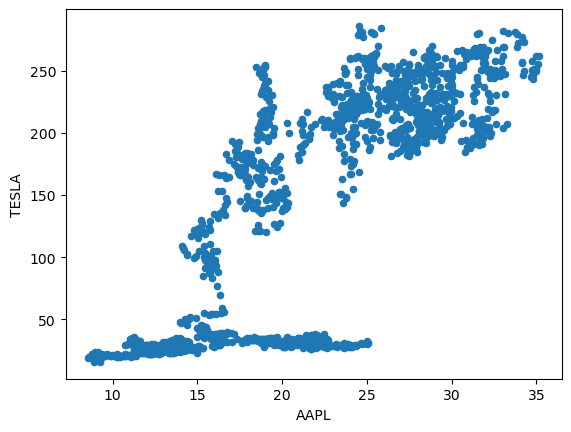

In [40]:
# Plot the relationship between the two variables
joined_data_columns.plot(kind='scatter', x='AAPL', y='TESLA')

In [32]:
# calcul of daily return of AAPL and Tesla
Daily_returns =joined_data_columns .pct_change()
Daily_returns.head()


,AAPL,TESLA
Date,,
2010-06-29,NaN,NaN
2010-06-30,-0.018113,-0.002511
2010-07-01,-0.012126,-0.078473
2010-07-02,-0.006198,-0.125683
2010-07-06,0.006844,-0.160937


<Axes: xlabel='Date'>

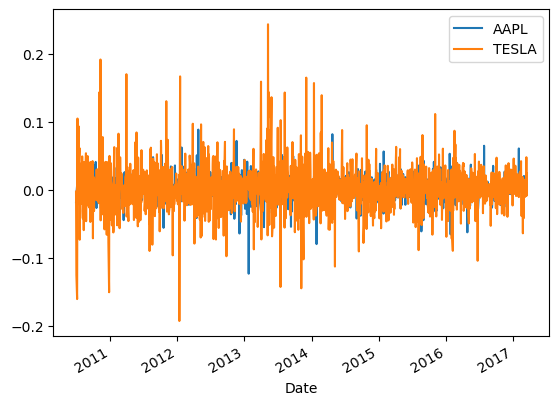

In [33]:
# Plot the daily returns of AAPL and TESLA
Daily_returns.plot()

In [34]:
# Calculate the correlation between each column
correlation = Daily_returns.corr()
correlation

,AAPL,TESLA
AAPL,1.000000,0.214554
TESLA,0.214554,1.000000


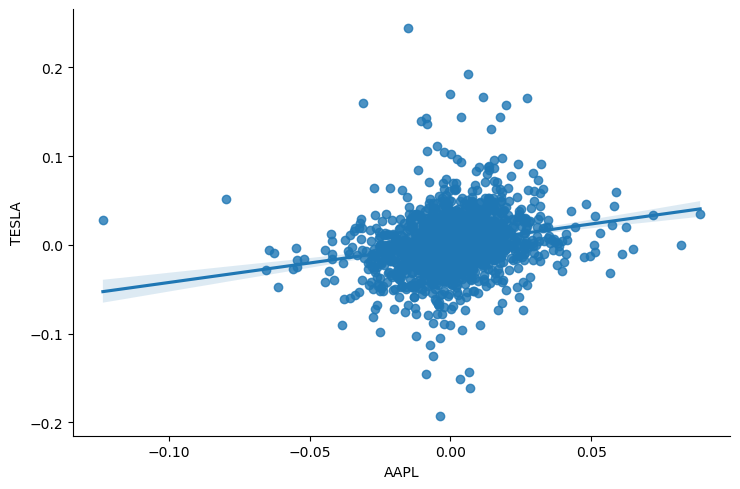

In [42]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='AAPL', y='TESLA', data=Daily_returns, aspect=1.5, fit_reg=True)

<Axes: >

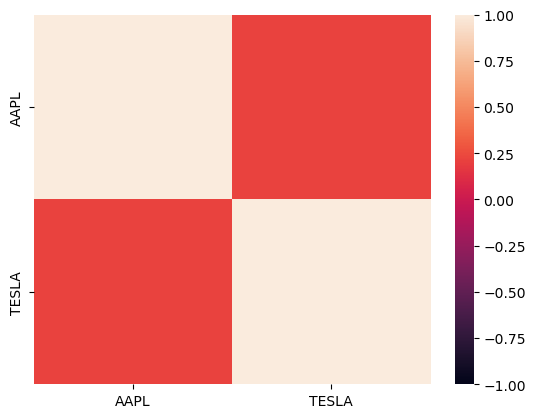

In [38]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

In [16]:
#calcu daily portofolio returns
weights = [0.6, 0.4]

portfolio_returns = Daily_returns.dot(weights)
portfolio_returns.head()

Date
2010-06-29         NaN
2010-06-30   -0.011872
2010-07-01   -0.038664
2010-07-02   -0.053992
2010-07-06   -0.060269
dtype: float64

<Axes: xlabel='Date'>

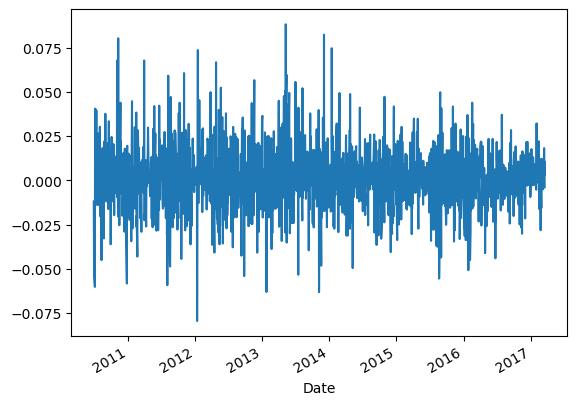

In [93]:
#plot the portofolio daily return
portfolio_returns.plot()

In [94]:
# Calculate the cumulative using the 'cumprod()' function
cumulative = (1 + portfolio_returns).cumprod()
cumulative.head()  

Date
2010-06-29         NaN
2010-06-30    0.988128
2010-07-01    0.949922
2010-07-02    0.898634
2010-07-06    0.844475
dtype: float64

<Axes: xlabel='Date'>

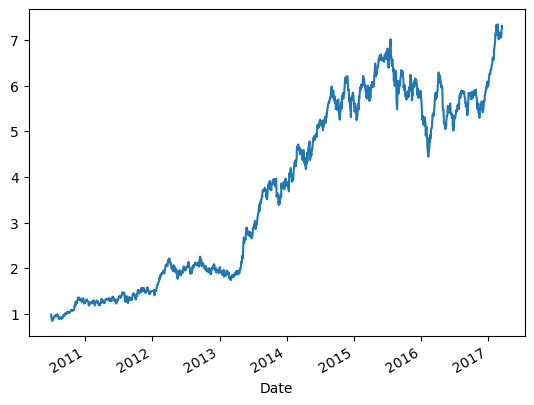

In [95]:
# Plot the cumulative of the AAPL over the last 5 years
cumulative.plot()